# Visualizing Embedding Space of Stella on the 20 News Groups dataset

In this code demo, we visualize the embedding space of the 20 News Groups dataset using Stella + dimensionality reduction techniques like tSNE, PCA, and UMAP.

We will also offer a compare/contrast of these 3 dimensionality reduction + visualization methods

The goal is to better understand how embedding models work, especially for retreival use cases in RAG systems.

We run the code using the T4 GPU on Google Colab in order to expedite embedding latency.

<a target="_blank" href="https://colab.research.google.com/github/choonghwanlee/visualize-embeddings-aipi590-fall24/blob/main/main.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [29]:
%pip install sentence-transformers
%pip install umap-learn

In [12]:
# Import libraries

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import numpy as np

### Fetch & Embed Data

In [7]:
## Load dataset
newsgroups = fetch_20newsgroups(subset='all')
texts = newsgroups.data[:300]  # Use first 300 samples for embedding
labels = newsgroups.target[:300]

In [9]:
## Load embedding model and encode text
model = SentenceTransformer("stella_en_400M_v5")
embeddings = model.encode(texts, show_progress_bar=True)

model.safetensors:   0%|          | 0.00/6.17G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/370 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

2_Dense_1024/config.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/6.30M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.30M [00:00<?, ?B/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


### Visualize Embeddings

In [28]:
def plot_2d_embedding(embeddings_2d, title, labels):
    """
    Helper function to plot 2D embeddings

    :param embeddings_2d: 2D numpy array of embeddings
    :param title: Title for the plot
    :param labels: True class labels for color-coding the points
    """
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='tab20', s=10)
    plt.colorbar(scatter, ticks=range(len(np.unique(labels))))
    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()


In [14]:
# Reduce dimensions with PCA to 2D
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)


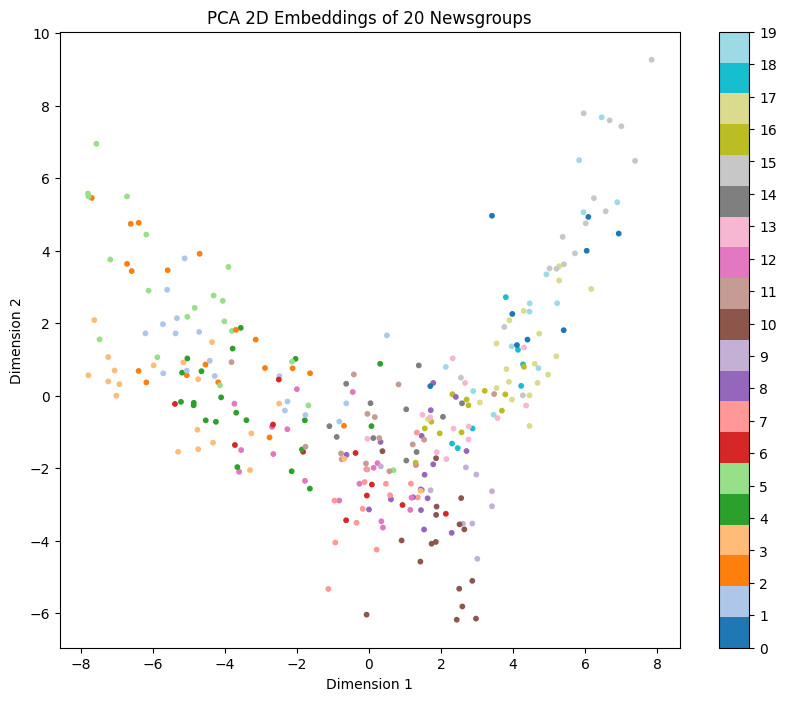

In [27]:
# Plot PCA result
plot_2d_embedding(embeddings_pca, "PCA 2D Embeddings of 20 Newsgroups", labels)

In [24]:
# Reduce dimensions with t-SNE to 2D
tsne = TSNE(n_components=2, perplexity=15, max_iter=300)
embeddings_tsne = tsne.fit_transform(embeddings)

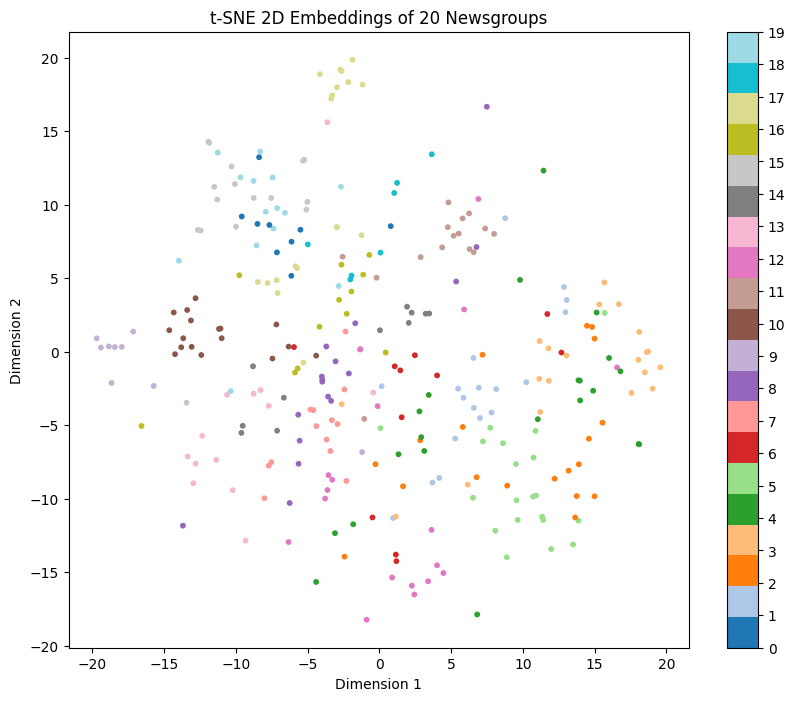

In [25]:
# Plot t-SNE result
plot_2d_embedding(embeddings_tsne, "t-SNE 2D Embeddings of 20 Newsgroups", labels)


In [17]:
# Reduce dimensions with UMAP to 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_umap = umap_reducer.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


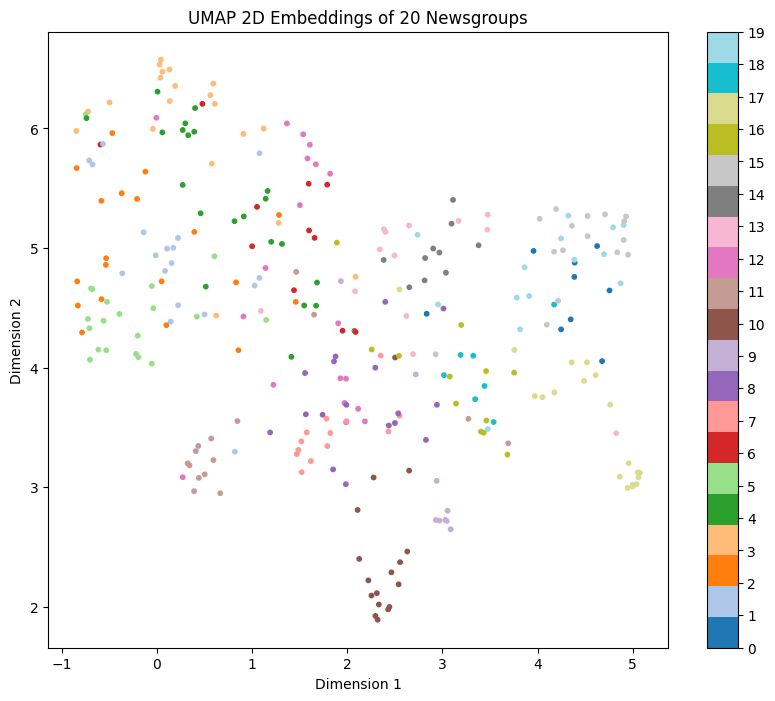

In [23]:
# Plot UMAP result
plot_2d_embedding(embeddings_umap, "UMAP 2D Embeddings of 20 Newsgroups", labels)

### Interpretation of Visualizations

Above we generated visualizations of the 20 News Group dataset using tSNE, PCA, and UMAP.

Generally speaking, we do not see clusters that are clearly distinct from one another. This is somewhat expected since text/language from one topic is not mutually exclusive with other topics. However, we do note some key distinctions:

First and foremost, we note that UMAP and tSNE does a better job preserving intra-class similarity than PCA does. In other words, text from one class are generally closer to one another than text from another class. For our UMAP and tSNE visualizations, this is clearly notable for the group "hockey" (class 10, colour dark brown), "middle eastern politics" (class 17, light yellow), or "windows computer" (class 5, light green). However, such distinction is not as clear in PCA.

This makes sense because PCA is limited to linear relationships, meaning clusters will not be formed for non-linearly separable data. On the other hand, UMAP and tSNE is suitable for non-linear relationships.

Comparing UMAP and tSNE, we note that UMAP is slightly preferable for two reasons: computational efficiency and preservation of both local and global structure. Not only is UMAP generally faster to compute than tSNE, but it also preserves relationships between cluseters and subgroups within clusters. To that end, note that UMAP visualizations have slightly better distinction between clusters than tSNE visualizations do.